<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing Chipotle Data

_Author: Joseph Nelson (DC)_

---

For Project 2, you will complete a series of exercises exploring [order data from Chipotle](https://github.com/TheUpshot/chipotle), compliments of _The New York Times'_ "The Upshot."

For these exercises, you will conduct basic exploratory data analysis (Pandas not required) to understand the essentials of Chipotle's order data: how many orders are being made, the average price per order, how many different ingredients are used, etc. These allow you to practice business analysis skills while also becoming comfortable with Python.

---

## Basic Level

### Part 1: Read in the file with `csv.reader()` and store it in an object called `file_nested_list`.

Hint: This is a TSV (tab-separated value) file, and `csv.reader()` needs to be told [how to handle it](https://docs.python.org/2/library/csv.html).

In [3]:
import csv
from collections import namedtuple   # Convenient to store the data rows

DATA_FILE = './data/chipotle.tsv'

In [2]:
with open(DATA_FILE) as f:
    file_nested_list=[row for row in csv.reader(f, delimiter='\t')]

In [3]:
# validate the results
file_nested_list[:5]

[['order_id', 'quantity', 'item_name', 'choice_description', 'item_price'],
 ['1', '1', 'Chips and Fresh Tomato Salsa', 'NULL', '$2.39 '],
 ['1', '1', 'Izze', '[Clementine]', '$3.39 '],
 ['1', '1', 'Nantucket Nectar', '[Apple]', '$3.39 '],
 ['1', '1', 'Chips and Tomatillo-Green Chili Salsa', 'NULL', '$2.39 ']]

### Part 2: Separate `file_nested_list` into the `header` and the `data`.


In [4]:
header = file_nested_list[0]

In [5]:
data = file_nested_list[1:]

---

## Intermediate Level

### Part 3: Calculate the average price of an order.

Hint: Examine the data to see if the `quantity` column is relevant to this calculation.

Hint: Think carefully about the simplest way to do this!

In [4]:
# dataframe makes it much eaiser
import pandas as pd
file_nested_list = pd.read_csv(DATA_FILE, delimiter = '\t')

In [7]:
# quantity column is not relevant, because the item_price has taken into account of quantities
# for example:
file_nested_list.loc[[18,53],]

,order_id,quantity,item_name,choice_description,item_price
18,9,2,Canned Soda,[Sprite],$2.18
53,24,1,Canned Soda,[Sprite],$1.09


In [8]:
# the itme_price column is string, convert it to float
file_nested_list['item_price_float'] = file_nested_list['item_price'].str.replace('$', '').astype(float)

In [9]:
# avg price = total price / # of orders
print('The average price of an order is ${}'.
      format(round(
          file_nested_list.groupby('order_id')['item_price_float'].sum().mean(), 2)
            )
     )


The average price of an order is $18.81


### Part 4: Create a list (or set) named `unique_sodas` containing all of unique sodas and soft drinks that Chipotle sells.

Note: Just look for `'Canned Soda'` and `'Canned Soft Drink'`, and ignore other drinks like `'Izze'`.

In [10]:
file_nested_list.head()

,order_id,quantity,item_name,choice_description,item_price,item_price_float
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [5]:
# select rows where item_name is either 'Canned Soda' or 'Canned Soft Drink'
# get the unique list soda names
unique_sodas = file_nested_list.loc[(file_nested_list.item_name=='Canned Soda')|(file_nested_list.item_name=='Canned Soft Drink'),
                     'choice_description'].str.replace(r'\[|\]','',regex=True).unique().tolist()



In [6]:
print("Sodas and soft drinks that Chipotle sells: {}".format(unique_sodas))

Sodas and soft drinks that Chipotle sells: ['Sprite', 'Dr. Pepper', 'Mountain Dew', 'Diet Dr. Pepper', 'Coca Cola', 'Diet Coke', 'Coke', 'Lemonade', 'Nestea']


---

## Advanced Level


### Part 5: Calculate the average number of toppings per burrito.

Note: Let's ignore the `quantity` column to simplify this task.

Hint: Think carefully about the easiest way to count the number of toppings!


In [7]:
# Select rows where item_name contains 'Burrito'
# count the number of ',' of each row and plus 1, we get the number of toppings
avg_toppings = (file_nested_list[file_nested_list.item_name.str.contains('Burrito')]['choice_description'].str.count(',')+1).mean()
print('The average number of toppings per burrito: {}'.
     format(round(avg_toppings, 2)))


The average number of toppings per burrito: 5.4


### Part 6: Create a dictionary. Let the keys represent chip orders and the values represent the total number of orders.

Expected output: `{'Chips and Roasted Chili-Corn Salsa': 18, ... }`

Note: Please take the `quantity` column into account!

Optional: Learn how to use `.defaultdict()` to simplify your code.

In [14]:
# need to replace '-' with ' ' for item_name
file_nested_list.loc[file_nested_list.item_name.str.contains('Chip'),['quantity','item_name']].\
replace(r'-',' ',regex=True).\
groupby('item_name').\
sum().\
quantity.to_dict()




{'Chips': 230,
 'Chips and Fresh Tomato Salsa': 130,
 'Chips and Guacamole': 506,
 'Chips and Mild Fresh Tomato Salsa': 1,
 'Chips and Roasted Chili Corn Salsa': 41,
 'Chips and Tomatillo Green Chili Salsa': 78,
 'Chips and Tomatillo Red Chili Salsa': 75,
 'Side of Chips': 110}

---

## Bonus: Craft a problem statement about this data that interests you, and then answer it!


### Most common of item combinations? (Or most relevent items)

In [ ]:
# too many item_name, group a few together

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv(DATA_FILE, delimiter = '\t')

In [18]:
conditions = [
    df.item_name.str.contains('Chips'),
    df.item_name.str.contains('Burrito'),
    df.item_name.str.contains('Taco'),
    df.item_name.str.contains('Canned|Drink|Water|Izze|Nantucket Nectar'),
    df.item_name.str.contains('Salad'),
    df.item_name.str.contains('Bowl')
]


results = [
    'Chips',
    'Burrito',
    'Taco',
    'Drink',
    'Salad',
    'Bowl'
]

df['item_group'] = np.select(conditions, results, df.item_name)

In [20]:
df.head(20)

,order_id,quantity,item_name,choice_description,item_price,item_group
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,Chips
1,1,1,Izze,[Clementine],$3.39,Drink
2,1,1,Nantucket Nectar,[Apple],$3.39,Drink
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,Chips
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,Bowl
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98,Bowl
6,3,1,Side of Chips,NaN,$1.69,Chips
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75,Burrito
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25,Taco
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25,Burrito


In [21]:
table = pd.pivot_table(df, values = 'quantity', index = ['order_id'], columns = ['item_group'], fill_value = 0,aggfunc=np.sum)


In [22]:
table.head()

item_group,Bowl,Burrito,Chips,Drink,Salad,Taco
order_id,,,,,,
1,0,0,2,2,0,0
2,2,0,0,0,0,0
3,1,0,1,0,0,0
4,0,1,0,0,0,1
5,0,1,1,0,0,0


Text(0.5, 1.0, 'Corrlation between items')

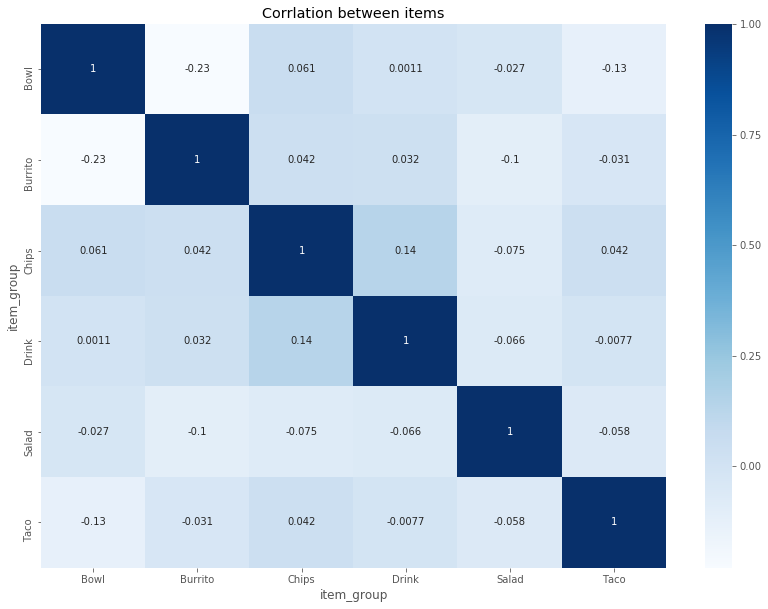

In [35]:
plt.figure(figsize=(14,10))
sns.heatmap(table.corr(), cmap="Blues", annot=True)
plt.title('Corrlation between items')